## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# zip into list of tuples
mouse_times = list(zip(mouse_study['Mouse ID'], mouse_study['Timepoint']))

# iterate tuples
for element in mouse_times:
    
    # dictionary containing tuple and number of times tuple appears in list
    duplicate_search = {element: mouse_times.count(element)}
    
    # multiple occurences = duplicates
    if mouse_times.count(element) > 1:
        print(element)
    

('g989', 0)
('g989', 0)
('g989', 5)
('g989', 5)
('g989', 10)
('g989', 10)
('g989', 15)
('g989', 15)
('g989', 20)
('g989', 20)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study = mouse_study.set_index('Mouse ID')
print(mouse_study.loc['g989'])

         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study.drop('g989', axis=0)
mouse_study_cleaned = mouse_study_cleaned.rename(columns={"Age_months": "Age (months)"})
mouse_study_cleaned.head()

,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned = mouse_study_cleaned.reset_index()
len(mouse_study_cleaned['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods

# group data by drug regimen
grouped_drug = mouse_study_cleaned.groupby(["Drug Regimen"])

# calculate mean, median, variance, std, and sem
tumor_mean = grouped_drug.mean()["Tumor Volume (mm3)"]
tumor_median = grouped_drug.median()["Tumor Volume (mm3)"]
tumor_var = grouped_drug.var()["Tumor Volume (mm3)"]
tumor_std = grouped_drug.std()["Tumor Volume (mm3)"]
tumor_sem = grouped_drug.sem()["Tumor Volume (mm3)"]

# create dataframe to hold summary
summary_stats = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_var,
    "STD": tumor_std,
    "SEM": tumor_sem
})

print(summary_stats)

                   Mean     Median   Variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# (https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg)
summary_agg = mouse_study_cleaned[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])

print(summary_agg)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

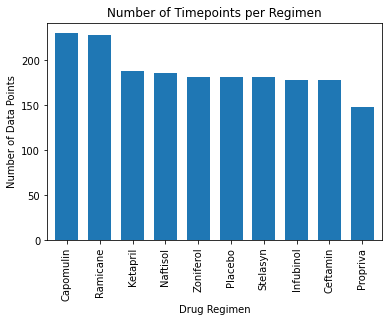

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
bar_plot = mouse_study_cleaned["Drug Regimen"].value_counts().plot.bar(width=0.7)

# create axis labels
bar_plot.set_title("Number of Timepoints per Regimen")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")

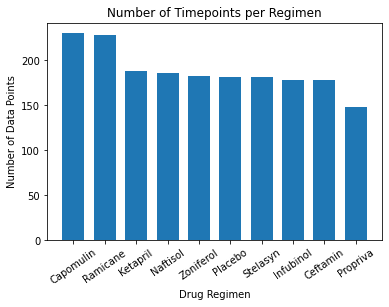

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# calculate number of timepoints per regimen
y_axis = mouse_study_cleaned["Drug Regimen"].value_counts()

# x_axis
x_axis = mouse_study_cleaned["Drug Regimen"].value_counts().index

# create bar plot
plt.bar(x_axis, y_axis, width=0.7)

# create axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Timepoints per Regimen")

# rotate ticks for legibility
plt.xticks(rotation=35)

plt.show()

Text(0.5, 1.0, 'Distribution by Sex')

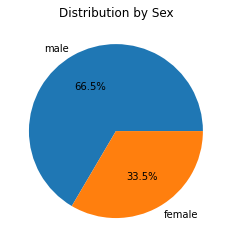

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# each mouse has different number of data points, so it's not accurate to simply use mouse_study_cleaned["Sex"].value_counts()
# first we'll separate the data we want: sex of each unique mouse ID
# (https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
groupedBy_sex = list(zip(mouse_study_cleaned["Sex"], mouse_study_cleaned["Mouse ID"].unique()))
groupedBy_sex_df = pd.DataFrame(groupedBy_sex)

#create pie plot
data = groupedBy_sex_df[0].value_counts()
labels = ['male', 'female']

pie_plot = data.plot.pie(labels=labels, autopct='%1.1f%%')
pie_plot.set_ylabel('')
pie_plot.set_title("Distribution by Sex")

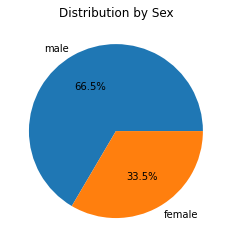

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = groupedBy_sex_df[0].value_counts()
labels = ['male', 'female']

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title("Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(mouse_study_cleaned.groupby("Mouse ID")["Timepoint"].max())
max_tp
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint = pd.merge(mouse_study_cleaned, max_tp, on="Mouse ID")
merged_timepoint = merged_timepoint.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Max Timepoint"})
merged_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_tumorVolume = []

# locate drugs from 'drugs' list in merged_timepoint
for drug in drugs:
    
    drugs_match = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == drug]
    
    # within drugs_match, isolate rows where Timepoint = Max Timepoint
    max_time = drugs_match.loc[drugs_match["Timepoint"] == drugs_match["Max Timepoint"]]
    
    # create series containing tumor volumes at Max Timepoint
    volumes = max_time["Tumor Volume (mm3)"]
    drug_tumorVolume.append(volumes)
    
    # calculate and print IQR for each regimen
    # (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    print(f"IQR for {drug}: {iqr}")
    
    # calculate and print upper / lower bounds to identify outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    print(f"Lower Bound ({drug}): {lower_bound}")
    print(f"Upper Bound ({drug}): {upper_bound}")
    
    # check for any outliers
    outliers_count = (volumes.loc[(max_time["Tumor Volume (mm3)"] >= upper_bound) | (max_time["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"Number of Outliers ({drug}): {outliers_count}")
    print("-----------------------------------")
    

IQR for Capomulin: 7.781863460000004
Lower Bound (Capomulin): 20.70456164999999
Upper Bound (Capomulin): 51.83201549
Number of Outliers (Capomulin): 0
-----------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound (Ramicane): 17.912664470000003
Upper Bound (Ramicane): 54.30681135
Number of Outliers (Ramicane): 0
-----------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound (Infubinol): 36.83290494999999
Upper Bound (Infubinol): 82.74144559000001
Number of Outliers (Infubinol): 1
-----------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound (Ceftamin): 25.355449580000002
Upper Bound (Ceftamin): 87.66645829999999
Number of Outliers (Ceftamin): 0
-----------------------------------


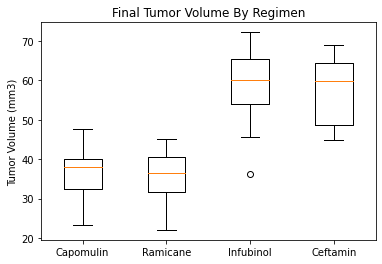

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
plt.boxplot(drug_tumorVolume)

plt.title("Final Tumor Volume By Regimen")
plt.ylabel("Tumor Volume (mm3)")
# rename ticks as drug regimens
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
